# パーセプトロン

- パーセプトロンは入出力を備えたアルゴリズム。ある入力を与えたら、決まった値が出力される
- パーセプトロンでは「重み」「バイアス」をパラメタとして設定する
    - $x_1$,$x_2$は入力信号、yは出力信号、$w_1$,$w_2$は重み
    - 重みが大きければ大きいほど、その重みに対応する信号の重要性が高くなる
        - 重みは、電流で言うところの「抵抗」である
    - ニューロンでは、送られてきた信号の挿話が計算され、その総和がある限界値を超えた場合にのみ１を出力する（ニューロンが発火する）
        - その限界値を闘値と呼び、θで表す

$$
y = \left\{
    \begin{array}{ll}
        0 & (w_1x_1 + w_2x_2 <= θ) \\
        1 & (w_1x_1 + w_2x_2 > θ)
    \end{array}
\right.
$$

- -θをbとして、bをバイアスと呼ぶ
    - バイアスは発火のし易さ---出力信号が１を出力する度合い---を調整するパラメタ

$$
y = \left\{
    \begin{array}{ll}
        0 & (b + w_1x_1 + w_2x_2 <= 0) \\
        1 & (b + w_1x_1 + w_2x_2 > 0)
    \end{array}
\right.
$$

- パーセプトロンを用いれば、ANDやORゲートなどの論理回路を表現できる
- XORゲートは単層のパーセプトロンでは表現できない
- 2層のパーセプトロンを用いれば、XORゲートを表現することができる

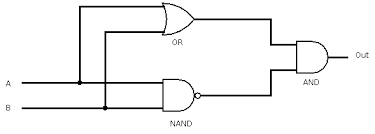

- 単層のパーセプトロンは線形領域だけしか表現出来ないのに対して、多層のパーセプトロンは非線形領域を表現することができる
- 多層のパーセプトロンは、（理論上）コンピュータを表現できる


- 学習とは
    - 適切なパラメータを決める作業であり、人が行う仕事は、パーセプトロンの構造（モデル）を考え、コンピュータに学習データを与えること

## AND回路

In [1]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    
    tmp = x1 * w1 + x2 * w2
    
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1
    
if __name__ == '__main__':
    for xs in [(0, 0), (0, 1), (1, 0), (1, 1)]:
        y = AND(xs[0], xs[1])
        print(str(xs) +  ' -> ' + str(y))

(0, 0) -> 0
(0, 1) -> 0
(1, 0) -> 0
(1, 1) -> 1


## AND回路(-θをb(バイアス)とした場合)、NAND回路、OR回路、XOR回路

In [4]:
import numpy as np

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    
    tmp = w @ x + b
#     print('tmp = {} @ {} + {}'.format(w,x,b))
    
    if tmp <= 0:
        return 0
    else:
        return 1

    
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    
    tmp = w @ x + b
#     print('tmp = {} @ {} + {}'.format(w,x,b))
    
    if tmp <= 0:
        return 0
    else:
        return 1

    
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    
    tmp = w @ x + b
#     print('tmp = {} @ {} + {}'.format(w,x,b))
    
    if tmp <= 0:
        return 0
    else:
        return 1

    
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    
    return y

In [5]:
if __name__ == '__main__':
    input_data = [(0, 0), (0, 1), (1, 0), (1, 1)]

    print('[AND]')
    for xs in input_data:
        y = AND(xs[0], xs[1])
        print(str(xs) +  ' -> ' + str(y))
        
    print('\n[NAND]')
    for xs in input_data:
        y = NAND(xs[0], xs[1])
        print( str(xs) +  ' -> ' + str(y))
        
    print('\n[OR]')
    for xs in input_data:
        y = OR(xs[0], xs[1])
        print(str(xs) +  ' -> ' + str(y))
        
    print('\n[XOR]')
    for xs in input_data:
        y = XOR(xs[0], xs[1])
        print(str(xs) +  ' -> ' + str(y))

[AND]
(0, 0) -> 0
(0, 1) -> 0
(1, 0) -> 0
(1, 1) -> 1

[NAND]
(0, 0) -> 1
(0, 1) -> 1
(1, 0) -> 1
(1, 1) -> 0

[OR]
(0, 0) -> 0
(0, 1) -> 1
(1, 0) -> 1
(1, 1) -> 1

[XOR]
(0, 0) -> 0
(0, 1) -> 1
(1, 0) -> 1
(1, 1) -> 0
